# Data Analysis of the “War of the Five Kings” - Game of Thrones


## Before It Starts

This is my first project of data analysis, and it is wriiten by Jupyter notebook. The project is adopted from Data Analyst (Advance) Nanodegree program from Udacity. The dataset is adopted from Myles O'Neill from Kaggle. I am not a fan of Game of Thrones (even never watched). All conclusions are based on given dataset, which may not be accurate. Anyone who wants to use my code or conclusion persoanlly must refer to the source.


## Introduction

The War of the Five Kings is a famous civil war described in the well-known serious fantasy novel “Game of Thrones”. This is a civil strife with an unprecedented scale that involves seven kingdoms. As the name implies, a total of five persons claim to be the king during the war: Joffrey Baratheon, Stannis Baratheon and Renly Baratheon all claim to be the rightful heir of the iron throne. Moreover, Robb Stark is elected by the barons of the northern border to the King in the North, and Balon Greyjoy erects the flag of independence again and claims to be the King of the Iron Islands, in an attempt to shake off the ruling of the Iron Throne. 


This dataset (battles.csv) contains all the battles during the War of the Five Kings. It is part of the [Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones) in Kaggle. 


Variables in the dataset and meanings:


- **name:** String variable. The name of the battle.
- **year:** Numeric variable. The year of the battle.
- **battle_number:** Numeric variable. A unique ID number for the battle.
- **attacker_king:** Categorical. The attacker's king. A slash indicators that the king charges over the course of the war. For example, "Joffrey/Tommen Baratheon" is coded as such because one king follows the other in the Iron Throne.
- **defender_king:** Categorical variable. The defender's king.
- **attacker_1:** String variable. Major house attacking.
- **attacker_2:** String variable. Major house attacking.
- **attacker_3:** String variable. Major house attacking.
- **attacker_4:** String variable. Major house attacking.
- **defender_1:** String variable. Major house defending.
- **defender_2:** String variable. Major house defending.
- **defender_3:** String variable. Major house defending.
- **defender_4:** String variable. Major house defending.
- **attacker_outcome:** Categorical variable. The outcome from the perspective of the attacker. Categories: win, loss, draw.
- **battle_type:** Categorical variable. A classification of the battle's primary type. Categories:
    - pitched\_battle: Armies meet in a location and fight. This is also the baseline category.
    - ambush: A battle where stealth or subterfuge was the primary means of attack.
    - siege: A prolonged of a fortied position.
    - razing: An attack against an undefended position
- **major_death:** Binary variable. If there was a death of a major figure during the battle.
- **major_capture:** Binary variable. If there was the capture of the major figure during the battle.
- **attacker_size:** Numeric variable. The size of the attacker's force. No distinction is made between the types of soldiers such as cavalry and footmen.
- **defender_size:** Numeric variable. The size of the defenders's force. No distinction is made between the types of soldiers such as cavalry and footmen.
- **attacker_commander:** String variable. Major commanders of the attackers. Commander's names are included without honoric titles and commandders are seperated by commas.
- **defender_commander:** String variable. Major commanders of the defener. Commander's names are included without honoric titles and commandders are seperated by commas.
- **summer:** Binary variable. Was it summer?
- **location:** String variable. The location of the battle.
- **region:** Categorical variable. The region where the battle takes place. Categories: Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne
- **note:** String variable. Coding notes regarding individual observations.. 


## Asking Questions： 

- Which king does win the most number of battles?
- Which region does have the most number of battles?
- What is the key factors lead to victories?


## Data Wrangling


In [2]:
# load Pandas pacakges
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('bmh')

In [4]:
# load the dataset
df = pd.read_csv('./game-of-thrones/battles.csv')
df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
# check the dataset general info
df.info()
df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
dtype: bool

In [6]:
df.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [7]:
mask = df['attacker_size'] == 100000
df[mask]

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
27,Battle of Castle Black,300,28,Stannis Baratheon,Mance Rayder,Free folk,Thenns,Giants,NaN,Night's Watch,...,1.0,1.0,100000.0,1240.0,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",0.0,Castle Black,Beyond the Wall,NaN


> **Note:** From info() function, we can see that there are 38 entries in the dataset. Some values are missing. From duplicated() function, there is no duplicated row in the dataset. We then need to proceed to clean data process since some data are missing.

In [8]:
# clean the data
df.loc[mask, 'attacker_size'] = None
df[mask]

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
27,Battle of Castle Black,300,28,Stannis Baratheon,Mance Rayder,Free folk,Thenns,Giants,NaN,Night's Watch,...,1.0,1.0,NaN,1240.0,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",0.0,Castle Black,Beyond the Wall,NaN


In [9]:
df.dropna(1, how='all', inplace=True)
df['major_death'] = df['major_death'].astype('bool')
df['major_capture'] = df['major_capture'].astype('bool')
df['summer'] = df['summer'].astype('bool')
df['attacker_outcome'] = df['attacker_outcome'].fillna('draw')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 23 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
attacker_outcome      38 non-null object
battle_type           37 non-null object
major_death           38 non-null bool
major_capture         38 non-null bool
attacker_size         23 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                38 non-null bool
location              37 non-null object
region                38 non-null object
note

## Exploratory data analysis

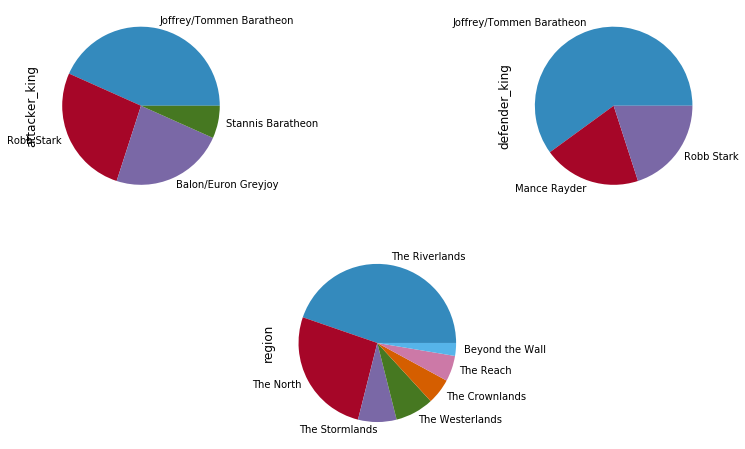

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(235)
df_win = df[df['attacker_outcome'] == 'win']
df_lose = df[df['attacker_outcome'] == 'loss']
df_win['attacker_king'].value_counts().plot(kind='pie', ax=ax1);
df_lose['defender_king'].value_counts().plot(kind='pie', ax=ax2);
df['region'].value_counts().plot(kind='pie', ax=ax3);  

> **Note:** From the two pie charts above, it is clear that Joffrey/Thommen Baratheon is the king who wins the most both in defending and attacking. For the diagram below, most battles took place in the Riverlands.

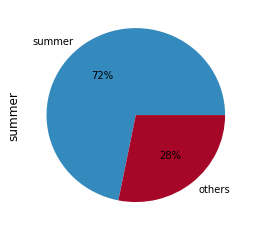

In [14]:
df_win['summer'].value_counts().plot(kind='pie', labels=['summer','others'], autopct='%.0f%%', figsize=(4,4));
ax1.set_ylabel('% of Battles');

> **Note:** It is quite clear that most win battles happened in summer.

## Draw conclusions




## Further Reflections

**Question**: Is your logic rigorous during your analysis and summary? Is there any space for further improvement?  You can think about these questions from the following perspectives: 
1. Is the dataset integral? Does it contain all data you want to analyze? 
2. May your operation (for example, delete/fill missing values) influence your conclusion during data process? 
3. Are there any other variables (which are not contained in the dataset) to help your analysis? 
4. Have you mixed correlation and causality when drawing a conclusion? 

**Answer**: 
  Although the sample space is quite small in this dataset, it has all neccessary information I want to analyze. I am lack of dealing with missing data in cleaning data step. I used deletion missing string and filling missing numeric value by mean value to deal with the missing data. It may not influence my conclusion in the first two questions since the sum is significantly higher than the others in my first two question. The last question I set is somewhat affected, because I filled it with mean value. It might have some deviation compared with correct value. I tried to mix the correlation and causality, but mostly it is based on data. Actually, I am not sure whether I should include some personal views in the conclusion. Also, I am unsure whether I should clean all data or just the data I need to use.

